## Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


C:\ProgramData\anaconda_3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\ProgramData\anaconda_3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=T

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
# Reading the dataset
df=pd.read_csv('day.csv')

In [5]:
# Let's take a look at the first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df.shape


(730, 16)

In [9]:
# Checking the numerical columns data distribution statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
# Summary of the dataset: 729 rows, 16 columns, no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

- As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [13]:

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [14]:
df.head(10)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [15]:
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty+cloudy',3:'Light_snowrain',4:'Snow+Fog'})
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,Misty+cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,Misty+cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
df.shape

(730, 16)

## Step 2: Visualising the Data

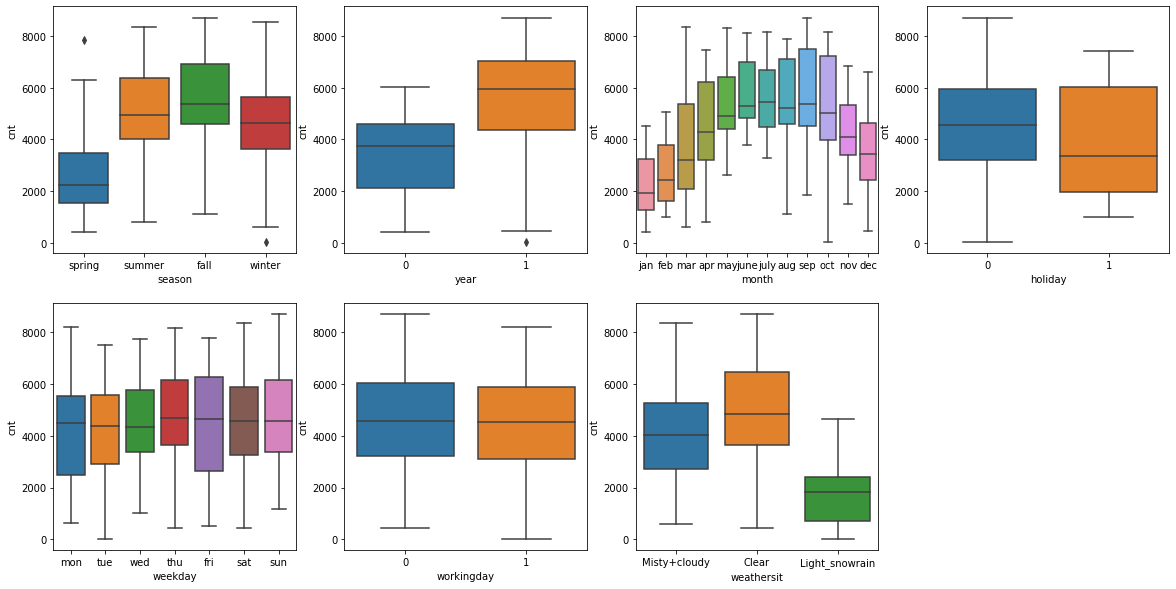

In [17]:
# visualizing the categorical columns
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,4,2)
sns.boxplot(x='year',y='cnt',data=df)
plt.subplot(2,4,3)
sns.boxplot(x='month',y='cnt',data=df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

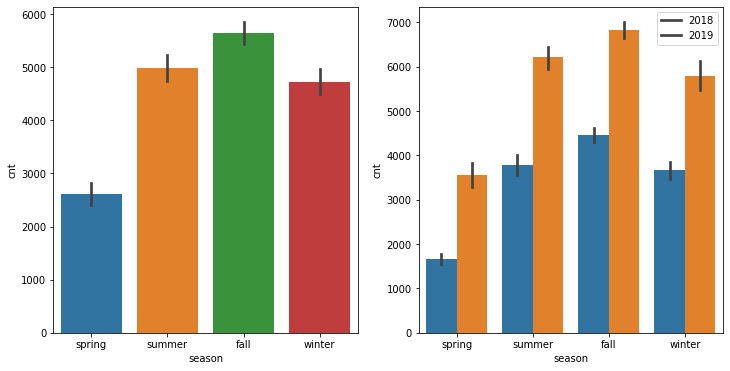

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot('season','cnt',data=df)
plt.subplot(1,2,2)
sns.barplot('season','cnt',data=df, hue='year')
plt.legend(labels=['2018', '2019'])
plt.show()

- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

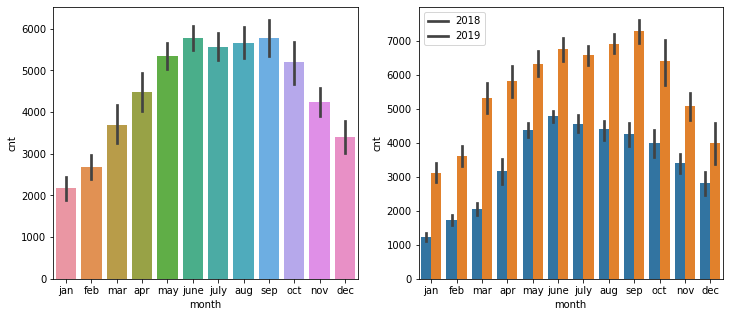

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot('month','cnt',data=df)
plt.subplot(1,2,2)
sns.barplot('month','cnt',data=df, hue='year')
plt.legend(labels=['2018', '2019'])
plt.show()

- Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

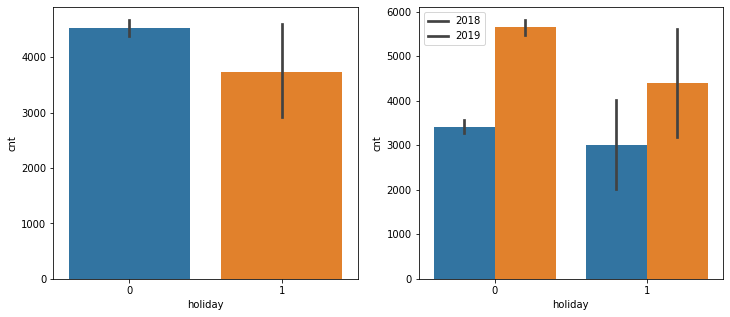

In [20]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot('holiday','cnt',data=df)
plt.subplot(1,2,2)
sns.barplot('holiday','cnt',data=df, hue='year')
plt.legend(labels=['2018', '2019'])
plt.show()

- When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

##### Let's now make a pairwise scatter plot and observe linear relationships.

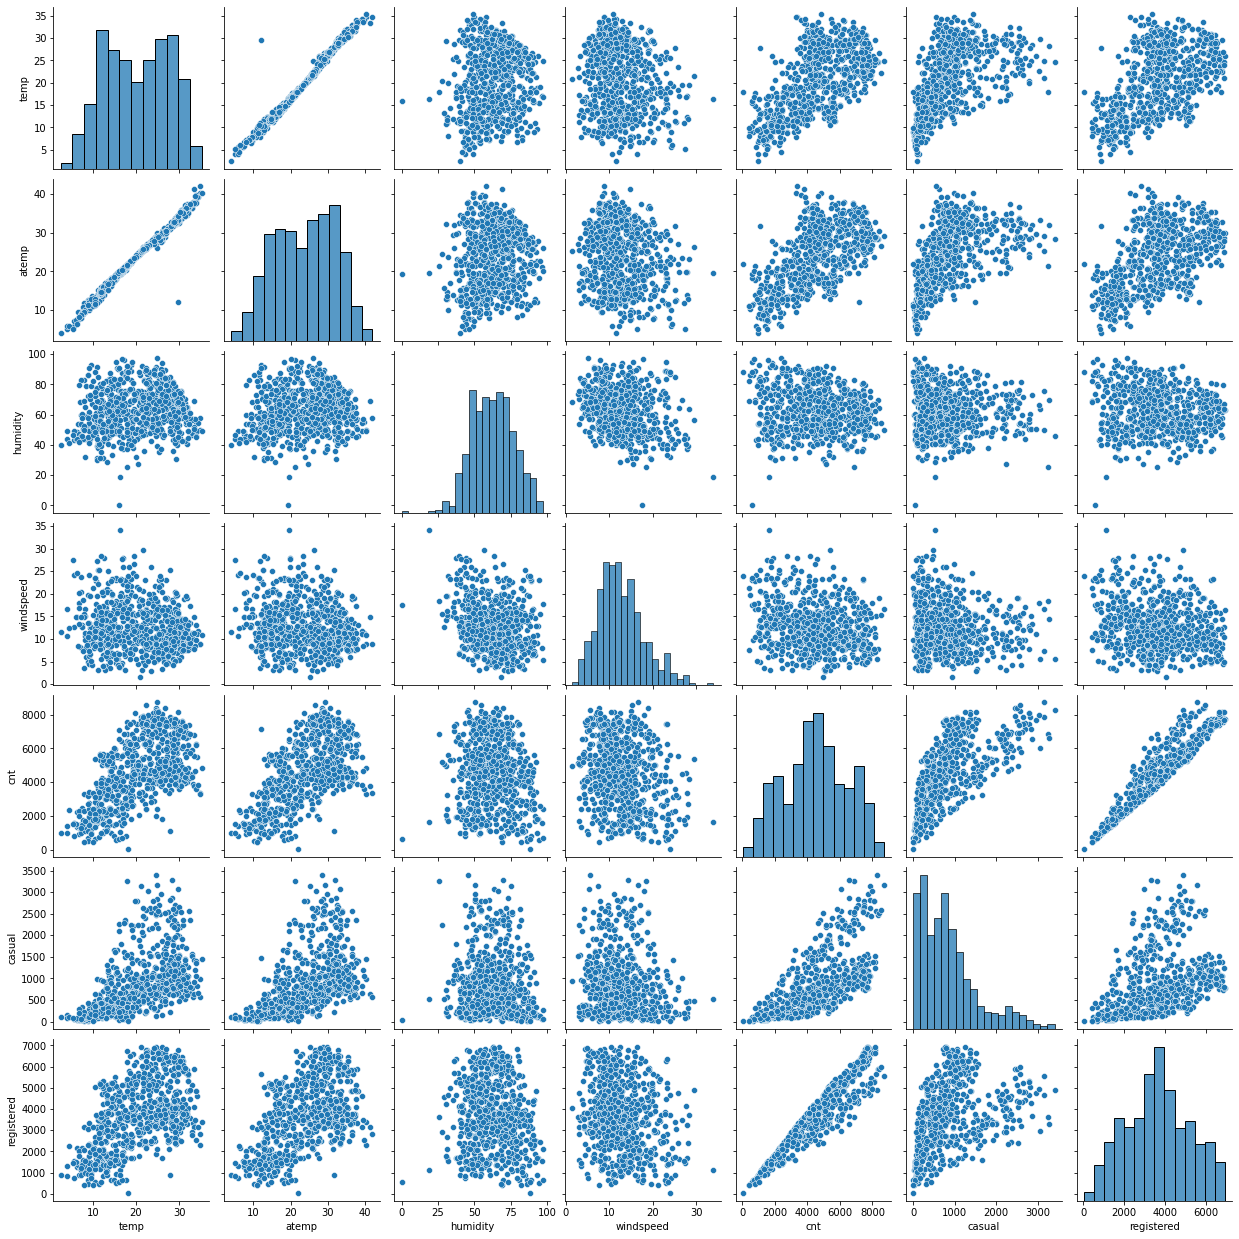

In [21]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt','casual','registered'])
plt.show()

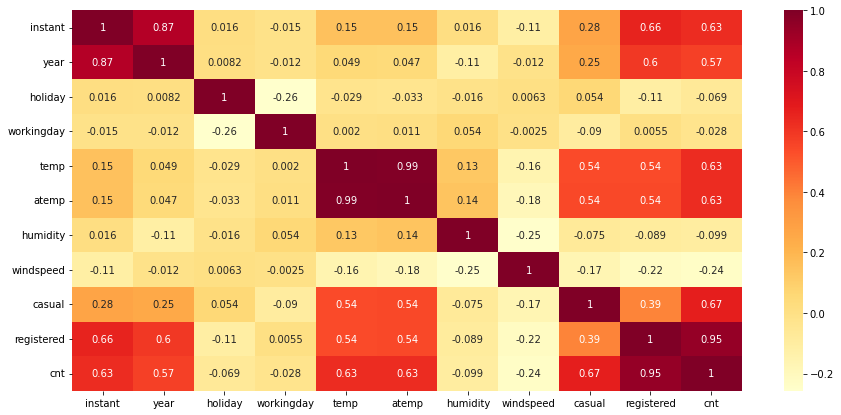

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.show()

- As shown in heatmap temp, atemp, casual, registered variables are positively correlated to target Variable `count` 
- Some other variables are also correlated to target Variable `count`



In [23]:
# correlation between temp and atemp is 0.99 which is almost 1
# Let us drop atemp and consider temp
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,Misty+cloudy,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,Misty+cloudy,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [24]:
# Drop Unwanted columns
#from the given data we can see that instant is an index column so we drop it
df.drop(['instant'],axis=1,inplace=True)


In [25]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

df.drop(['dteday'],axis=1,inplace=True)
df.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,casual,registered,cnt
0,spring,0,jan,0,mon,1,Misty+cloudy,14.110847,80.5833,10.749882,331,654,985
1,spring,0,jan,0,tue,1,Misty+cloudy,14.902598,69.6087,16.652113,131,670,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [26]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty+cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty+cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


## step 3: Data Preparation 

#### Dummy variable creation for month,weathersit,weekday,season

In [27]:
#Dummy variable creation for month, weekday, weathersit and 
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [28]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty+cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty+cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


In [29]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [30]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty+cloudy,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty+cloudy,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty+cloudy,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
df_new.shape

(730, 33)

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   humidity        730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [33]:
df_new.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [34]:
df_new.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty+cloudy,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## step 4: Splitting the data into Training and Testing Sets

In [35]:
# splitting the datafame into Train and Test 
np.random.seed(0)
df_train,df_test=train_test_split(df_new,train_size=0.7,random_state=100)

In [36]:
print(df_test.shape)
print(df_train.shape)

(220, 29)
(510, 29)


### Rescaling using 'Min-Max scaliing' method

In [37]:
# Using MinMaxScaler()
scaler = MinMaxScaler()

In [38]:
numerical_var=['temp','humidity','windspeed','cnt']
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

In [39]:
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty+cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [40]:
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty+cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


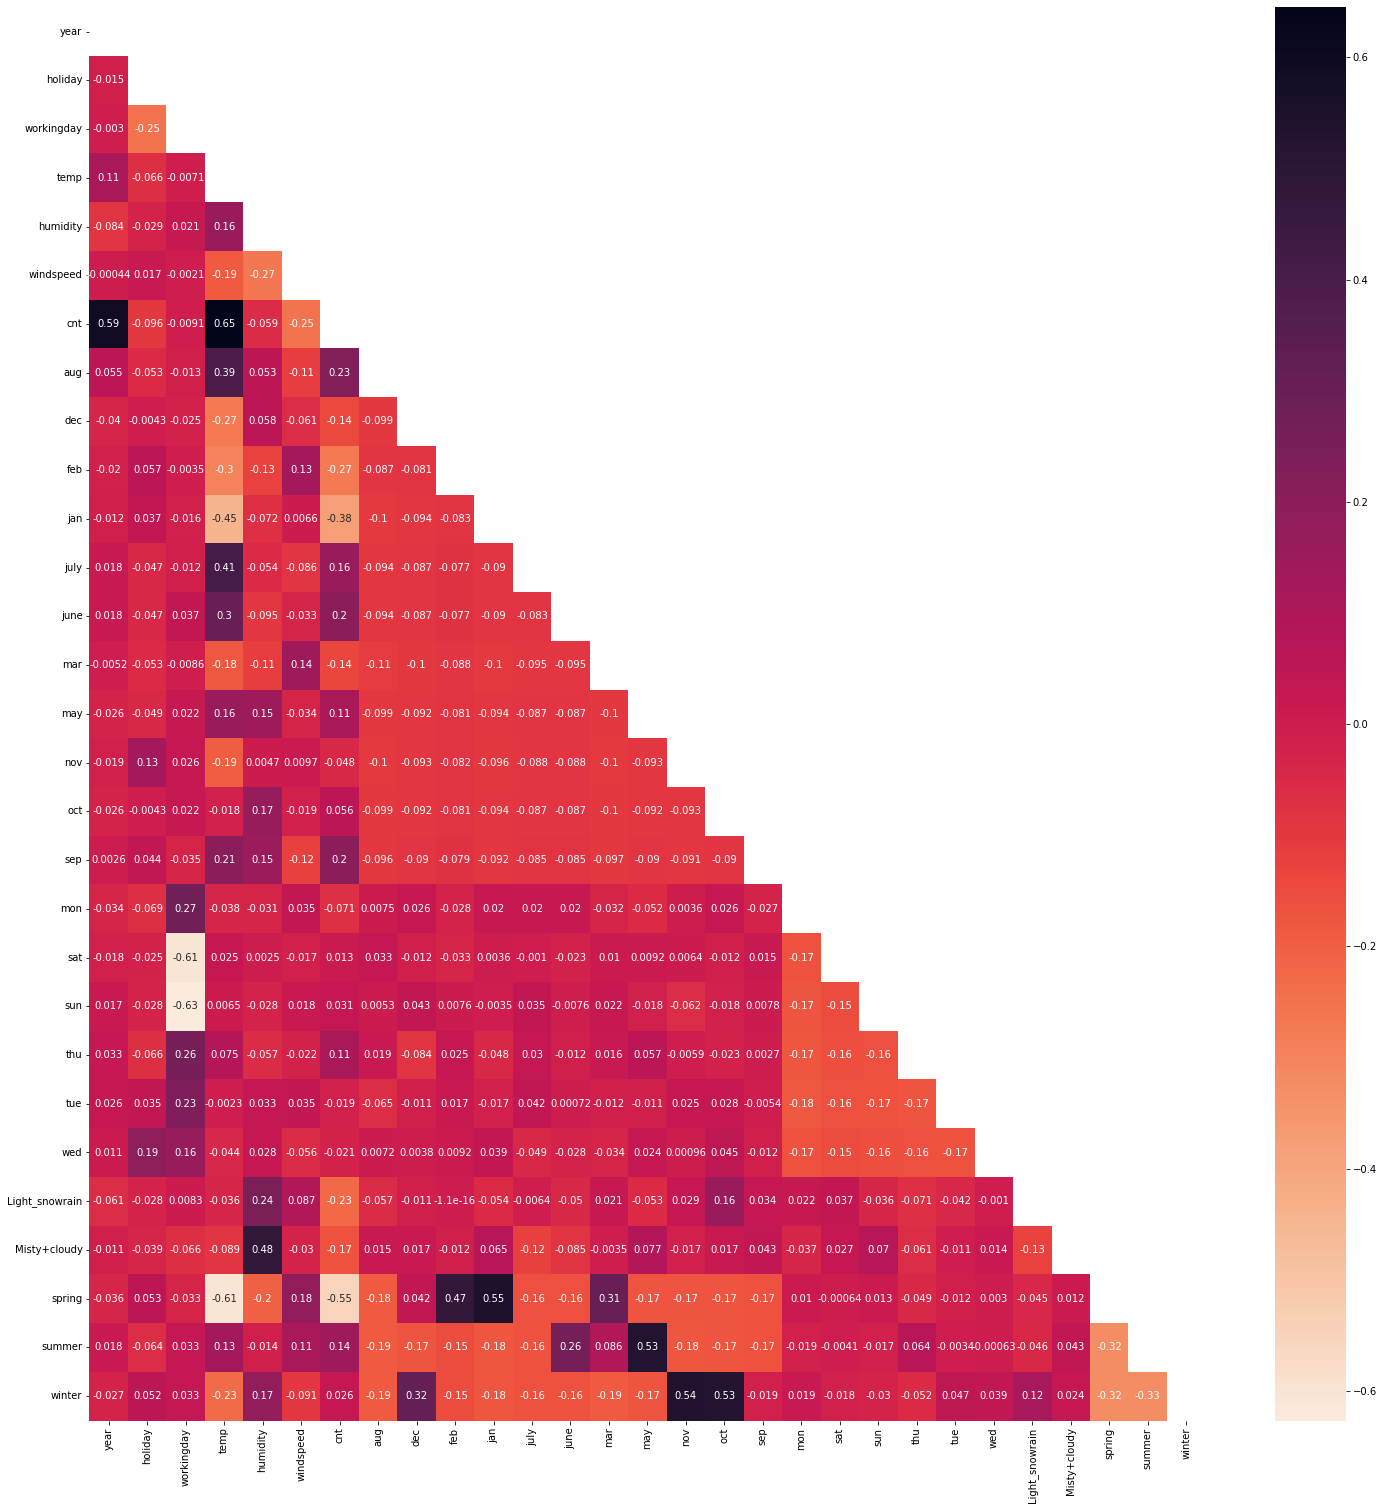

In [41]:
# check the correlation coefficient to see which variable are highly correlated
plt.figure(figsize=(25,26))
matrix =np.triu(df_train.corr())
sns.heatmap(df_train.corr(),annot =True,cmap='rocket_r',mask=matrix)
plt.show()

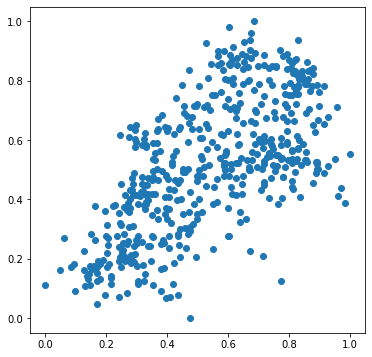

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

In [43]:
# Building the linear model
y_train =df_train.pop('cnt')
X_train =df_train

##  Step 5: Building linear regression models

In [44]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe =RFE(lm,15)
rfe =rfe.fit(X_train,y_train)

C:\ProgramData\anaconda_3\lib\site-packages\sklearn\feature_selection\rfe.py:157: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  support_ = np.ones(n_features, dtype=np.bool)
C:\ProgramData\anaconda_3\lib\site-packages\sklearn\feature_selection\rfe.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and gu

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty+cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [46]:
# Column where RFE support is True
col=X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty+cloudy', 'spring',
       'summer', 'winter'],
      dtype='object')


In [47]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [48]:
# Taking 15 columns supported by RFE for regression 

In [49]:
X_train_rfe = X_train[col]

### Model 1 

In [50]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [51]:
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty+cloudy,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


In [52]:
# Building th first linear model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.15e-189
Time:                        10:25:37   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

* Decided to drop 'hum' due to high VIF.
* Keeping 'temp' as temperature could be an important factor for a business like bike rentals. We will check this further

- We generally droped variables who have high p-values(>0.005) and high VIF(>5)  or high p-values and low VIF.
- We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.
- so, Dec,Jan and Nov have high p-value and low VIF. dropping these variables one by one and see what kind impact it has on over model

### Model 2

In [53]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

In [54]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty+cloudy,1.57


In [55]:
X_train_lm_2 = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.75e-186
Time:                        10:25:37   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

### Model 3

In [56]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty+cloudy,1.57
7,sep,1.34


In [57]:
### Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.74e-186
Time:                        10:25:37   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

### Model 4

In [58]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty+cloudy,1.56
6,sep,1.34


In [59]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.14e-187
Time:                        10:25:37   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

### Model 5

In [60]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty+cloudy,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [61]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.06e-187
Time:                        10:25:37   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

### model 6

In [62]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty+cloudy,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [63]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.47e-186
Time:                        10:25:37   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

### Insight 

*  The Model 6 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
*  The R-squared and Adj. R-squared looks very good at 0.786 and 0.783 respectively.
*  F-static is also large, stating a good fit of model.
*   We will check the test data metrics to check whether this model is significant enough or not.


In [64]:
lm_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty+cloudy     -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## The eqution of best fitted surface based on model lm_6:
### count=0.190855+(0.234132 xyear) -(0.096316 x holiday)+(0.477737 x temp) -(0.148098xwindspeed)+ (0.090998 x sep)-( 0.285031 x Light_snowrain)-(0.078741 x Misty) - (0.055406 x spring)+( 0.062076 x summer) + ( 0.094476 x winter)



## We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
### F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

## Step 6: Residual Analysis of the train data and validation

In [65]:
y_train_pred = lm_6.predict(X_train_lm_6)


In [66]:
X_train_lm_6.head()

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty+cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0


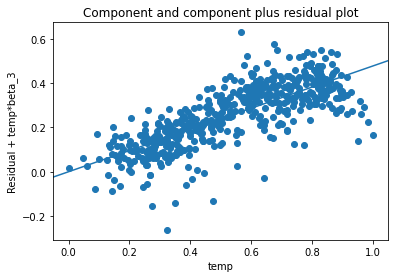

In [67]:
sm.graphics.plot_ccpr(lm_6,'temp')
plt.show()

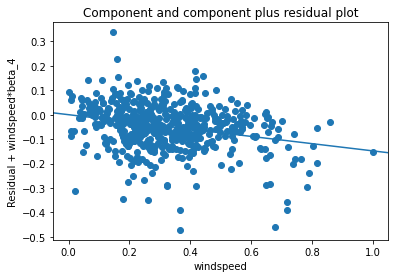

In [68]:
sm.graphics.plot_ccpr(lm_6, 'windspeed')
plt.show()

In [69]:
res=y_train-y_train_pred

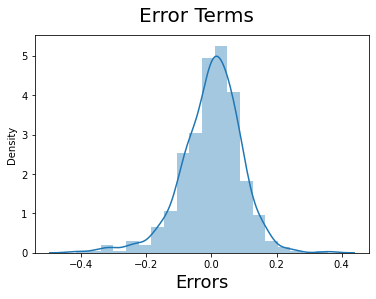

In [70]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

- Inference :

- Error terms for training set are normally distributed.
- Also the mean is near to 0
- This means that the model has a constant variance i.e. Homoscedasticity.

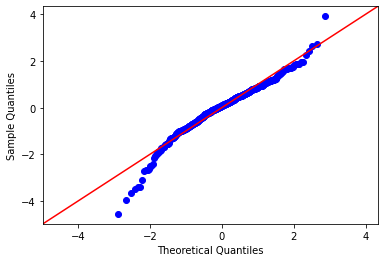

In [71]:
sm.qqplot((res), fit=True, line='45')
plt.show()

In [72]:
X_train_lm_6.columns

Index(['const', 'year', 'holiday', 'temp', 'windspeed', 'sep',
       'Light_snowrain', 'Misty+cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [73]:
print(X_train_lm_6.shape)
print(res.shape)

(510, 11)
(510,)


## Step 7: Making Predictions Using the Final Model

In [74]:
#Scaling the test data
numerical_var=['temp','humidity','windspeed','cnt']
df_test[numerical_var] = scaler.transform(df_test[numerical_var])

In [75]:
y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
col1= X_train_new.columns
X_test = X_test[col1]
X_test_lm_6 =sm.add_constant(X_test)

In [77]:
y_pred = lm_6.predict(X_test_lm_6)


## Step 8: Model Evaluation


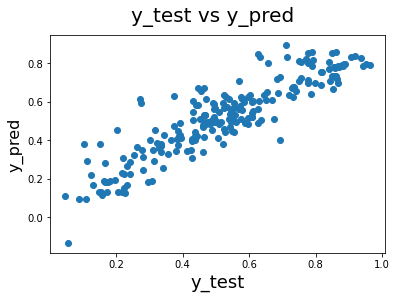

In [78]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### R-Squared value Test


In [79]:
r2=r2_score(y_test, y_pred)
r2

0.8038195990728842

### Adjusted R-Squared value Test

In [80]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


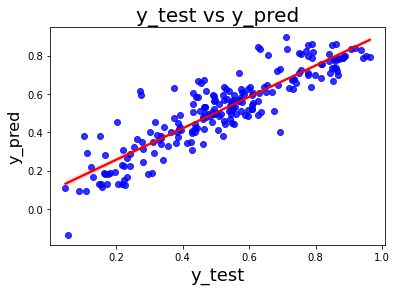

In [81]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


## Final result comparison
- Train R^2 :0.833
- Train Adjusted R^2 :0.829
- Test R^2 :0.803
- Test Adjusted R^2 :0.794

### Top  important predictor variables:

- Temperature (temp) - A coefficient value of '0.4777' indicated that a unit increase in temp variable increases the bike hire numbers by 0.4777 units.
- Year (yr) - A coefficient value of ‘0.2341’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2341 units.
- spring - A coefficient value of ‘-0.2850’ indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 0.2850 units.